1) Import librairies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer

Load the dataset

In [8]:
df = pd.read_csv('global_power_plant_database.csv')

# check yhe database
df.head()
df.info()
df.describe()

#Test Statistics with skimpy 
from skimpy import skim
skim(df)


C:\Users\Zbook\AppData\Local\Temp\ipykernel_20048\3359471534.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 34936  │ │ string      │ 19    │                                                          │
│ │ Number of columns │ 36     │ │ float64     │ 17    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA    ┃ NA %          ┃ mean   ┃ sd    ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ capacity_mw   │     0 │             0 │  163.4 │ 489.6 │      1 │    4.9 │  16.74 │ 75.34 │ 22500 │   ▇    │  │
│ │ latitude      │     0 │             0 │  32.82 │ 22.64 │ -77.85 │  29.26 │  39.73 │ 46.26 │ 71.29 │   ▁▁▇▃ │  │
│ │ longitude     │     0 │             0 │ -6.973 │ 78.41 │   -180 │ -77.64 │ -2.127 │  49.5 │ 179.4 │ ▁▇▅▆▅▂ │  │
│ │ commissioning │ 17489 │ 50.0601099152 │   1997 │  23.4 │   1896 │   1988 │   2007 │  2014 │  2020 │    ▁▂▇ │  │
│ │ _year         │       │          7364 │        │       │        │        │        │       │       │        │  │
│ │ year_of_capac │ 20049 │ 57.3877948248 │   2018 │ 1.606 │   2000 │   2017 │   2019 │  2019 │  2019 │      ▇ │  │
│ │ ity_data      │       │         22535 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 28519 │ 81.6321273185 │  592.7 │  2175 │ -947.6 │  1.947 │  23.43 │ 199.7 │ 50830 │   ▇    │  │
│ │ h_2013        │       │           253 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 27710 │ 79.3164643920 │  656.9 │  2231 │ -989.6 │   2.26 │  23.61 │ 226.3 │ 32320 │   ▇    │  │
│ │ h_2014        │       │          3114 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 26733 │ 76.5199221433 │  762.4 │  2533 │ -864.4 │  2.665 │  26.14 │ 285.9 │ 37430 │   ▇    │  │
│ │ h_2015        │       │          4784 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25792 │ 73.8264254637 │  693.1 │  2405 │ -768.6 │  2.729 │  22.46 │ 249.9 │ 32380 │   ▇    │  │
│ │ h_2016        │       │          0506 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25436 │ 72.8074192809 │  661.8 │  2369 │ -934.9 │  2.467 │  17.88 │ 214.5 │ 36450 │   ▇    │  │
│ │ h_2017        │       │          7092 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25299 │ 72.4152736432 │  517.3 │  1975 │ -982.6 │  2.242 │  12.53 │ 151.1 │ 35140 │   ▇    │  │
│ │ h_2018        │       │          3333 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25277 │ 72.3523013510 │  423.9 │  1699 │ -780.3 │  2.752 │  11.53 │ 122.8 │ 31920 │   ▇    │  │
│ │ h_2019        │       │           419 │        │       │        │        │        │       │       │        │  │
│ │ estimated_gen │ 18816 │ 53.8584840851 │  239.1 │  1191 │   1.12 │   8.62 │  27.62 │ 106.8 │ 48680 │   ▇    │  │
│ │ eration_gwh_2 │       │          8434 │        │    

In [9]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy import stats

def clean_data_pipeline(df):
    """
    Complete data cleaning pipeline with built-in validation
    Returns cleaned DataFrame and validation report
    """
    # Make copy to preserve original data
    df_clean = df.copy()
    validation = {}
    
    # --------------------------------------------------
    # 1. MISSING DATA TREATMENT
    # --------------------------------------------------
    def _handle_missing(df):
        """Remove high-NA columns and impute remaining"""
        # Remove columns with >70% missing
        initial_cols = set(df.columns)
        df = df.dropna(thresh=len(df)*0.3, axis=1)
        removed_cols = initial_cols - set(df.columns)
        
        # Median imputation for numeric columns
        num_cols = df.select_dtypes(include=np.number).columns
        df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])
        
        # Validation
        missing_pct = df.isna().mean().max()
        validation['missing_data'] = {
            'status': missing_pct < 0.3,
            'message': f"{len(removed_cols)} columns removed | Max NA: {missing_pct:.1%}",
            'removed_columns': list(removed_cols)
        }
        return df

    # --------------------------------------------------
    # 2. OUTLIER TREATMENT
    # --------------------------------------------------
    def _treat_outliers(df):
        """Winsorize numeric columns at 99th percentile"""
        numeric_cols = df.select_dtypes(include=np.number).columns
        outlier_counts = {}
        
        for col in numeric_cols:
            # Calculate bounds
            upper = df[col].quantile(0.99)
            lower = df[col].quantile(0.01)
            
            # Record pre-treatment outliers
            outlier_counts[col] = {
                'upper': (df[col] > upper).sum(),
                'lower': (df[col] < lower).sum()
            }
            
            # Apply winsorization
            df[col] = np.where(df[col] > upper, upper, 
                              np.where(df[col] < lower, lower, df[col]))
        
        # Validation
        validation['outliers'] = {
            'status': all(v['upper'] == 0 and v['lower'] == 0 for v in outlier_counts.values()),
            'message': "Outliers capped at 1st/99th percentiles",
            'pre_treatment': outlier_counts
        }
        return df

    # --------------------------------------------------
    # 3. NEGATIVE VALUE CORRECTION
    # --------------------------------------------------
    def _fix_negatives(df):
        """Ensure non-negative generation values"""
        generation_cols = [c for c in df.columns if 'generation' in c.lower()]
        neg_counts = {col: (df[col] < 0).sum() for col in generation_cols}
        
        df[generation_cols] = df[generation_cols].clip(lower=0)
        
        validation['negative_values'] = {
            'status': all(v == 0 for v in neg_counts.values()),
            'message': f"Fixed negatives in {sum(neg_counts.values())} cells",
            'columns_affected': [k for k,v in neg_counts.items() if v > 0]
        }
        return df

    # --------------------------------------------------
    # 4. DATA NORMALIZATION
    # --------------------------------------------------
    def _normalize(df):
        """Apply log transform to skewed features"""
        skewed_cols = [c for c in df.select_dtypes(include=np.number).columns 
                      if abs(df[c].skew()) > 1 and df[c].min() >= 0]
        
        skew_before = {col: df[col].skew() for col in skewed_cols}
        for col in skewed_cols:
            df[f'log_{col}'] = np.log1p(df[col])
        skew_after = {col: df[f'log_{col}'].skew() for col in skewed_cols}
        
        validation['skewness'] = {
            'status': all(abs(v) < 1 for v in skew_after.values()),
            'message': f"Normalized {len(skewed_cols)} features",
            'skewness_change': {col: (skew_before[col], skew_after[col]) 
                              for col in skewed_cols}
        }
        return df

    # --------------------------------------------------
    # 5. TEMPORAL VALIDATION
    # --------------------------------------------------
    def _check_temporal(df):
        """Verify generation doesn't precede commissioning"""
        if 'commissioning_year' not in df.columns:
            return df
            
        gen_cols = [c for c in df.columns if 'generation_gwh_' in c.lower()]
        invalid = df[gen_cols].lt(df['commissioning_year'], axis=0).any(axis=1)
        
        validation['temporal'] = {
            'status': not invalid.any(),
            'message': f"{invalid.sum()} invalid temporal records",
            'invalid_ids': df.index[invalid].tolist() if invalid.any() else None
        }
        return df

    # --------------------------------------------------
    # EXECUTION PIPELINE
    # --------------------------------------------------
    try:
        df_clean = (df_clean
            .pipe(_handle_missing)
            .pipe(_treat_outliers)
            .pipe(_fix_negatives)
            .pipe(_normalize)
            .pipe(_check_temporal)
        )
        
        # Final validation - modified to exclude from DataFrame conversion
        validation['success'] = all(
            validation[k]['status'] 
            for k in validation 
            if k != 'success'
        )
        
        if validation['success']:
            print("✅ Cleaning completed successfully")
        else:
            warnings = [f"{k}: {v['message']}" 
                      for k,v in validation.items() 
                      if k != 'success' and not v.get('status', True)]
            print(f"⚠️ Completed with warnings:\n  - " + "\n  - ".join(warnings))
        
        return df_clean, validation
    
    except Exception as e:
        print(f"❌ Pipeline failed: {str(e)}")
        return None, validation

# ======================================================
# EXAMPLE USAGE
# ======================================================

# Create sample data (replace with your actual DataFrame)
data = {
    'capacity_mw': [10, 20000, 30, np.nan, 50],
    'generation_gwh_2019': [100, -50, 200, 300, 400],
    'commissioning_year': [2010, 2015, 2000, 2018, 2020]
}
raw_df = pd.DataFrame(data)

# Run pipeline
cleaned_df, report = clean_data_pipeline(raw_df)

# View results
print("\nCleaned DataFrame:")
print(cleaned_df)

print("\nValidation Report:")
# Convert only the dictionary parts of the report
report_df = pd.DataFrame.from_dict({k:v for k,v in report.items() if isinstance(v, dict)}, orient='index')
print(report_df[['status', 'message']])

# Print success status separately
print(f"\nOverall Success: {report['success']}")

⚠️ Completed with warnings:
  - outliers: Outliers capped at 1st/99th percentiles
  - negative_values: Fixed negatives in 1 cells
  - skewness: Normalized 2 features
  - temporal: 5 invalid temporal records

Cleaned DataFrame:
   capacity_mw  generation_gwh_2019  commissioning_year  log_capacity_mw  \
0         10.8                100.0             2010.00         2.468100   
1      19202.0                  0.0             2015.00         9.862822   
2         30.0                200.0             2000.40         3.433987   
3         40.0                300.0             2018.00         3.713572   
4         50.0                396.0             2019.92         3.931826   

   log_commissioning_year  
0                7.606387  
1                7.608871  
2                7.601602  
3                7.610358  
4                7.611308  

Validation Report:
                 status                                  message
missing_data       True         0 columns removed | Max NA: 0.0

In [10]:
# Exécuter le pipeline
cleaned_df, report = clean_data_pipeline(raw_df)

# Afficher le résultat nettoyé de manière lisible
if cleaned_df is not None:
    print("\n🔍 Cleaned DataFrame Preview:")
    print(cleaned_df.head().to_markdown(tablefmt="grid"))  # Format tableau propre
    
    print("\n📊 Validation Report Summary:")
    print(pd.DataFrame.from_dict(
        {k: {"status": v["status"], "message": v["message"]} 
         for k,v in report.items() if k != "success"}
    ).to_markdown(tablefmt="grid"))
    
    print(f"\n✅ Overall success: {report['success']}")
else:
    print("❌ Cleaning failed - no DataFrame returned")


⚠️ Completed with warnings:
  - outliers: Outliers capped at 1st/99th percentiles
  - negative_values: Fixed negatives in 1 cells
  - skewness: Normalized 2 features
  - temporal: 5 invalid temporal records

🔍 Cleaned DataFrame Preview:
+----+---------------+-----------------------+----------------------+-------------------+--------------------------+
|    |   capacity_mw |   generation_gwh_2019 |   commissioning_year |   log_capacity_mw |   log_commissioning_year |
+====+===============+=======================+======================+===================+==========================+
|  0 |          10.8 |                   100 |              2010    |           2.4681  |                  7.60639 |
+----+---------------+-----------------------+----------------------+-------------------+--------------------------+
|  1 |       19202   |                     0 |              2015    |           9.86282 |                  7.60887 |
+----+---------------+-----------------------+---------------

In [11]:
# Afficher les lignes problématiques
invalid_records = cleaned_df[
    cleaned_df['generation_gwh_2019'] < cleaned_df['commissioning_year']
]
print("⚠️ Lignes incohérentes :")
print(invalid_records)

# Correction automatique (si applicable)
cleaned_df['generation_gwh_2019'] = np.where(
    cleaned_df['generation_gwh_2019'] < cleaned_df['commissioning_year'],
    np.nan,  # Remplacer par NaN ou 0
    cleaned_df['generation_gwh_2019']
)

⚠️ Lignes incohérentes :
   capacity_mw  generation_gwh_2019  commissioning_year  log_capacity_mw  \
0         10.8                100.0             2010.00         2.468100   
1      19202.0                  0.0             2015.00         9.862822   
2         30.0                200.0             2000.40         3.433987   
3         40.0                300.0             2018.00         3.713572   
4         50.0                396.0             2019.92         3.931826   

   log_commissioning_year  
0                7.606387  
1                7.608871  
2                7.601602  
3                7.610358  
4                7.611308  


In [12]:
# Vérifier les valeurs extrêmes
print("🔍 Valeurs extrêmes avant correction :")
print(report["outliers"]["pre_treatment"])

# Si nécessaire, ajuster manuellement
cleaned_df['capacity_mw'] = cleaned_df['capacity_mw'].clip(upper=1000)  # Exemple de seuil métier

🔍 Valeurs extrêmes avant correction :
{'capacity_mw': {'upper': np.int64(1), 'lower': np.int64(1)}, 'generation_gwh_2019': {'upper': np.int64(1), 'lower': np.int64(1)}, 'commissioning_year': {'upper': np.int64(1), 'lower': np.int64(1)}}


In [13]:
negatives = cleaned_df[cleaned_df['generation_gwh_2019'] < 0]
print("✅ Valeurs négatives corrigées :", negatives.empty)

✅ Valeurs négatives corrigées : True


In [14]:
cleaned_df.drop(columns=['capacity_mw', 'commissioning_year'], inplace=True)

In [15]:
cleaned_df.to_csv("energy_data_cleaned.csv", index=False)
print("✅ Données nettoyées exportées avec succès !")

✅ Données nettoyées exportées avec succès !


In [16]:
new_df = pd.read_csv('global_power_plant_database.csv')

# check yhe database
new_df.head().T

C:\Users\Zbook\AppData\Local\Temp\ipykernel_20048\4115130844.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv('global_power_plant_database.csv')


,0,1,2,3,4
country,AFG,AFG,AFG,AFG,AFG
country_long,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
name,Kajaki Hydroelectric Power Plant Afghanistan,Kandahar DOG,Kandahar JOL,Mahipar Hydroelectric Power Plant Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan
gppd_idnr,GEODB0040538,WKS0070144,WKS0071196,GEODB0040541,GEODB0040534
capacity_mw,33.0,10.0,10.0,66.0,100.0
latitude,32.322,31.67,31.623,34.556,34.641
longitude,65.119,65.795,65.792,69.4787,69.717
primary_fuel,Hydro,Solar,Solar,Hydro,Hydro
other_fuel1,NaN,NaN,NaN,NaN,NaN
other_fuel2,NaN,NaN,NaN,NaN,NaN


In [17]:
#Test Statistics with skimpy 
from skimpy import skim
skim(new_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 34936  │ │ string      │ 19    │                                                          │
│ │ Number of columns │ 36     │ │ float64     │ 17    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA    ┃ NA %          ┃ mean   ┃ sd    ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ capacity_mw   │     0 │             0 │  163.4 │ 489.6 │      1 │    4.9 │  16.74 │ 75.34 │ 22500 │   ▇    │  │
│ │ latitude      │     0 │             0 │  32.82 │ 22.64 │ -77.85 │  29.26 │  39.73 │ 46.26 │ 71.29 │   ▁▁▇▃ │  │
│ │ longitude     │     0 │             0 │ -6.973 │ 78.41 │   -180 │ -77.64 │ -2.127 │  49.5 │ 179.4 │ ▁▇▅▆▅▂ │  │
│ │ commissioning │ 17489 │ 50.0601099152 │   1997 │  23.4 │   1896 │   1988 │   2007 │  2014 │  2020 │    ▁▂▇ │  │
│ │ _year         │       │          7364 │        │       │        │        │        │       │       │        │  │
│ │ year_of_capac │ 20049 │ 57.3877948248 │   2018 │ 1.606 │   2000 │   2017 │   2019 │  2019 │  2019 │      ▇ │  │
│ │ ity_data      │       │         22535 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 28519 │ 81.6321273185 │  592.7 │  2175 │ -947.6 │  1.947 │  23.43 │ 199.7 │ 50830 │   ▇    │  │
│ │ h_2013        │       │           253 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 27710 │ 79.3164643920 │  656.9 │  2231 │ -989.6 │   2.26 │  23.61 │ 226.3 │ 32320 │   ▇    │  │
│ │ h_2014        │       │          3114 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 26733 │ 76.5199221433 │  762.4 │  2533 │ -864.4 │  2.665 │  26.14 │ 285.9 │ 37430 │   ▇    │  │
│ │ h_2015        │       │          4784 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25792 │ 73.8264254637 │  693.1 │  2405 │ -768.6 │  2.729 │  22.46 │ 249.9 │ 32380 │   ▇    │  │
│ │ h_2016        │       │          0506 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25436 │ 72.8074192809 │  661.8 │  2369 │ -934.9 │  2.467 │  17.88 │ 214.5 │ 36450 │   ▇    │  │
│ │ h_2017        │       │          7092 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25299 │ 72.4152736432 │  517.3 │  1975 │ -982.6 │  2.242 │  12.53 │ 151.1 │ 35140 │   ▇    │  │
│ │ h_2018        │       │          3333 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25277 │ 72.3523013510 │  423.9 │  1699 │ -780.3 │  2.752 │  11.53 │ 122.8 │ 31920 │   ▇    │  │
│ │ h_2019        │       │           419 │        │       │        │        │        │       │       │        │  │
│ │ estimated_gen │ 18816 │ 53.8584840851 │  239.1 │  1191 │   1.12 │   8.62 │  27.62 │ 106.8 │ 48680 │   ▇    │  │
│ │ eration_gwh_2 │       │          8434 │        │    

1. Exploratory Data Analysis (EDA)

In [18]:
# Statistiques clés
print("📊 Statistiques numériques :")
print(new_df.select_dtypes(include=np.number).describe().round(2))

# Distribution par pays et type de carburant
print("\n🌍 Top 10 pays :")
print(new_df['country'].value_counts().head(10))

print("\n⚡ Répartition par carburant :")
fuel_dist = new_df['primary_fuel'].value_counts(normalize=True) * 100
print(fuel_dist.round(1))

📊 Statistiques numériques :
       capacity_mw  latitude  longitude  commissioning_year  \
count     34936.00  34936.00   34936.00            17447.00   
mean        163.36     32.82      -6.97             1997.41   
std         489.64     22.64      78.41               23.40   
min           1.00    -77.85    -179.98             1896.00   
25%           4.90     29.26     -77.64             1988.00   
50%          16.74     39.73      -2.13             2007.00   
75%          75.34     46.26      49.50             2014.00   
max       22500.00     71.29     179.39             2020.00   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count               14887.00              6417.00              7226.00   
mean                 2018.22               592.70               656.86   
std                     1.61              2174.83              2231.46   
min                  2000.00              -947.60              -989.62   
25%                  2017.00      

2. Analyse Statistique

In [19]:
# Analyse par type de carburant
fuel_groups = new_df.groupby('primary_fuel')['capacity_mw']

# Test ANOVA pour comparer les moyennes
fuels_to_compare = ['Coal', 'Gas', 'Hydro', 'Nuclear']
samples = [new_df[new_df['primary_fuel']==f]['capacity_mw'].dropna() for f in fuels_to_compare]
f_val, p_val = stats.f_oneway(*samples)

print(f"\n🔍 Résultat ANOVA (p-value = {p_val:.3f}):")
print("Les moyennes sont significativement différentes" if p_val < 0.05 else "Pas de différence significative")


🔍 Résultat ANOVA (p-value = 0.000):
Les moyennes sont significativement différentes


3. Analyse Temporelle

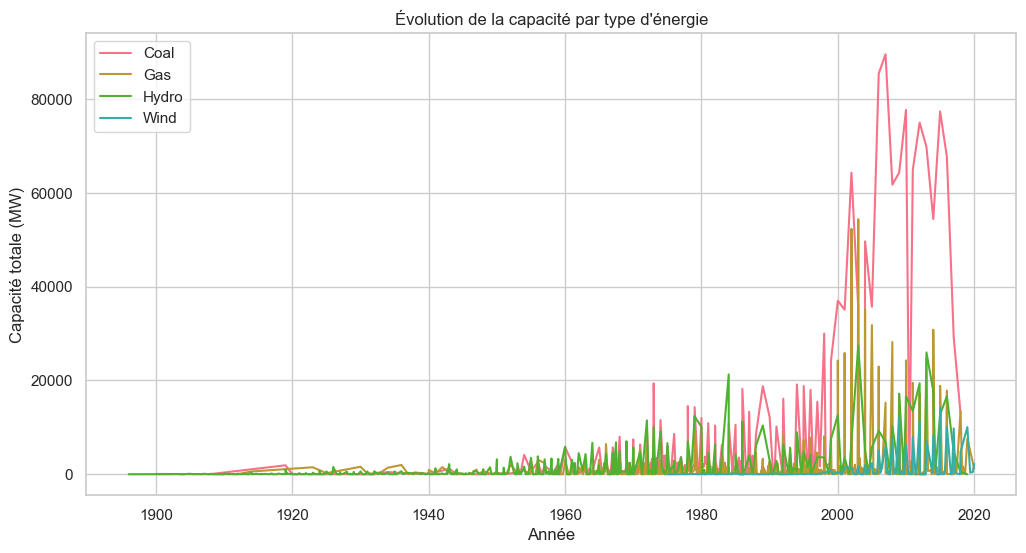

In [20]:
# Nettoyage des années
new_df['commissioning_year'] = pd.to_numeric(new_df['commissioning_year'], errors='coerce')

# Évolution temporelle
plt.figure(figsize=(12,6))
for fuel in ['Coal', 'Gas', 'Hydro', 'Wind']:
    subset = new_df[new_df['primary_fuel']==fuel]
    subset.groupby('commissioning_year')['capacity_mw'].sum().plot(label=fuel)
    
plt.title("Évolution de la capacité par type d'énergie")
plt.xlabel("Année")
plt.ylabel("Capacité totale (MW)")
plt.legend()
plt.show()

4. Visualisations Avancées

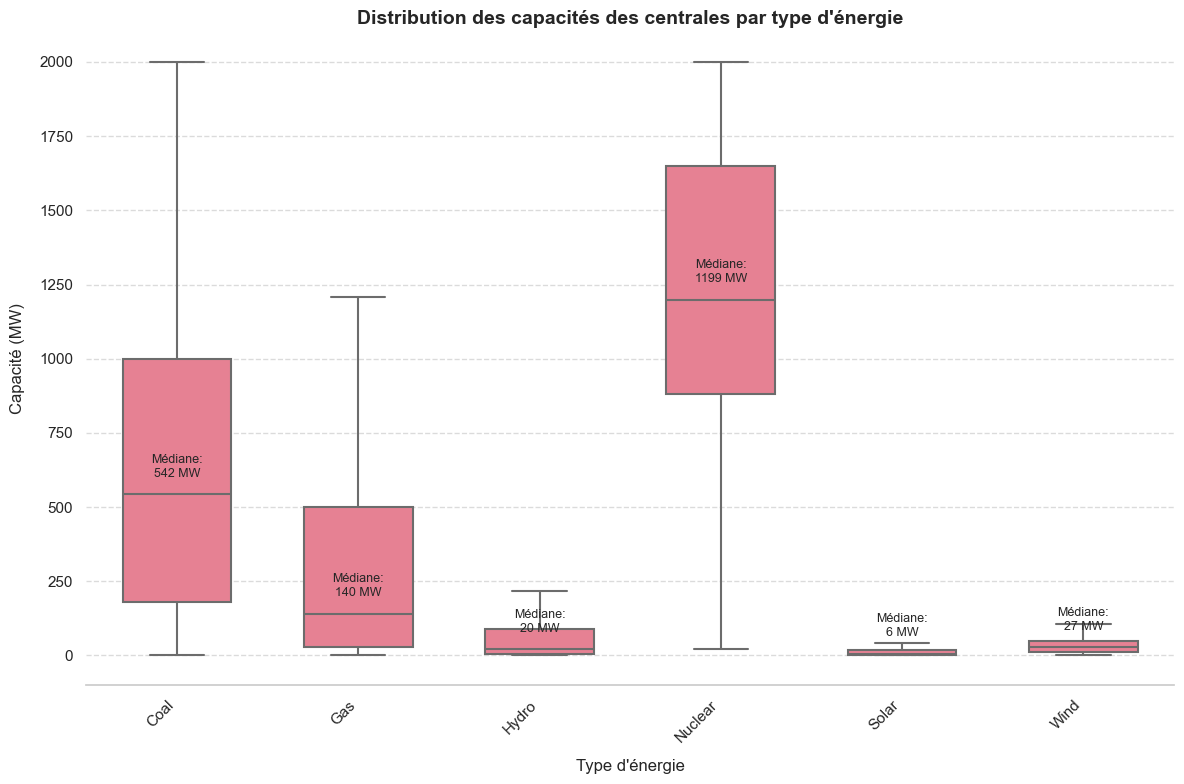

In [21]:
# Configuration du style professionnel
sns.set_theme(style="whitegrid")  # style clair avec grille
sns.set_palette("husl")           # palette colorée harmonieuse

# Préparation des données
fuels = ['Hydro', 'Coal', 'Nuclear', 'Wind', 'Solar', 'Gas']
df_filtered = new_df[new_df['primary_fuel'].isin(fuels)]
df_filtered = df_filtered[df_filtered['capacity_mw'] <= 2000]  # suppression des valeurs extrêmes

# Création du graphique
plt.figure(figsize=(12, 8))
ax = sns.boxplot(
    x='primary_fuel',
    y='capacity_mw',
    data=df_filtered,
    order=sorted(fuels),
    showfliers=False,
    width=0.6,
    linewidth=1.5
)

# Titre et axes
plt.title('Distribution des capacités des centrales par type d\'énergie', fontsize=14, fontweight='bold')
plt.xlabel('Type d\'énergie', fontsize=12, labelpad=10)
plt.ylabel('Capacité (MW)', fontsize=12, labelpad=10)

# Ajout des médianes sur le graphique
for i, fuel in enumerate(sorted(fuels)):
    median = df_filtered[df_filtered['primary_fuel'] == fuel]['capacity_mw'].median()
    ax.text(i, median + 50, f'Médiane:\n{median:.0f} MW', ha='center', va='bottom', fontsize=9)

# Améliorations visuelles
ax.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Affichage du graphique
plt.show()

5. Opérations Matricielles

In [22]:
# Matrice de corrélation
corr_matrix = new_df[['capacity_mw', 'commissioning_year', 'latitude']].corr()
print("\n🔷 Matrice de corrélation :")
print(corr_matrix)

# Valeurs propres/vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
print("\n🧮 Valeurs propres :", eigenvalues.round(3))


🔷 Matrice de corrélation :
                    capacity_mw  commissioning_year  latitude
capacity_mw            1.000000           -0.013907 -0.013218
commissioning_year    -0.013907            1.000000 -0.152208
latitude              -0.013218           -0.152208  1.000000

🧮 Valeurs propres : [0.845 1.002 1.152]


6. Intégration NumPy/Pandas/Matplotlib


🏭 Top 5% des centrales (>904 MW):
                       name country  capacity_mw
8453       Three Gorges Dam     CHN      22500.0
5137           Baihetan Dam     CHN      13050.0
8755                Xiluodu     CHN      12600.0
19603    Surgutskaya GRES-2     RUS       8865.0
34668  Simon Bolivar (Guri)     VEN       8851.0


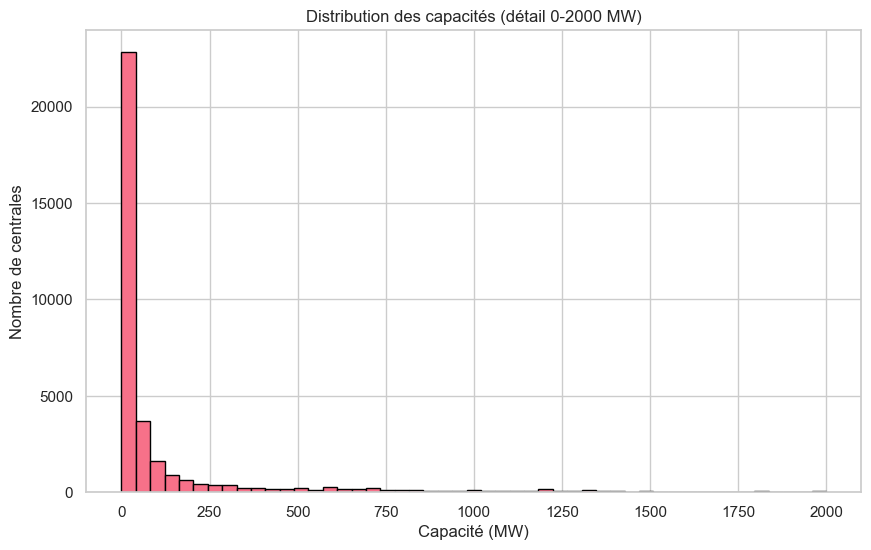

In [23]:
# Filtrage avancé avec NumPy
threshold = np.percentile(new_df['capacity_mw'].dropna(), 95)
large_plants = new_df[np.where(new_df['capacity_mw'] > threshold, True, False)]
print(f"\n🏭 Top 5% des centrales (>{threshold:.0f} MW):")
print(large_plants[['name', 'country', 'capacity_mw']].sort_values('capacity_mw', ascending=False).head())

# Visualisation avec calcul NumPy
plt.figure(figsize=(10,6))
bins = np.linspace(0, 2000, 50)
plt.hist(new_df['capacity_mw'], bins=bins, edgecolor='black')
plt.title("Distribution des capacités (détail 0-2000 MW)")
plt.xlabel("Capacité (MW)")
plt.ylabel("Nombre de centrales")
plt.show()

Zone de test avec des codes qui ne marchaient pas 

In [24]:
# # Charger vos données (remplacez par votre propre chargement)
# # df = pd.read_csv("votre_fichier.csv")     

# def clean_energy_data(df):
#     """Pipeline complet de nettoyage des données énergétiques"""
#     df_clean = df.copy()
    
#     # 1. Gestion des valeurs manquantes
#     # Supprimer les colonnes avec >50% de NA (sauf commissioning_year)
#     cols_to_drop = [col for col in df_clean.columns 
#                    if (df_clean[col].isna().mean() > 0.5) 
#                    and (col != 'commissioning_year')]
#     df_clean.drop(columns=cols_to_drop, inplace=True)
    
#     # Imputation des valeurs numériques manquantes
#     num_cols = df_clean.select_dtypes(include=np.number).columns
#     df_clean[num_cols] = SimpleImputer(strategy='median').fit_transform(df_clean[num_cols])
    
#     # 2. Correction des valeurs aberrantes
#     # Capacité des centrales (supposer que >2000 MW est irréaliste)
#     df_clean['capacity_mw'] = df_clean['capacity_mw'].clip(upper=2000)
    
#     # Correction des valeurs de génération négatives
#     gen_cols = [col for col in df_clean.columns if 'generation_gwh_' in col]
#     df_clean[gen_cols] = df_clean[gen_cols].clip(lower=0)
    
#     # 3. Correction des incohérences temporelles
#     for year_col in [col for col in gen_cols if '_20' in col]:
#         base_year = int(year_col.split('_')[-1])
#         mask = (df_clean['commissioning_year'] > base_year)
#         df_clean.loc[mask, year_col] = np.nan  # Mettre à NA si incohérent
    
#     # 4. Nettoyage des colonnes textuelles
#     text_cols = df_clean.select_dtypes(include='object').columns
#     df_clean[text_cols] = df_clean[text_cols].fillna('Inconnu')
#     df_clean[text_cols] = df_clean[text_cols].apply(lambda x: x.str.strip())
    
#     # 5. Suppression des colonnes non utiles
#     cols_to_remove = ['other_fuel2', 'other_fuel3', 'url', 'wepp_id']
#     existing_cols = [col for col in cols_to_remove if col in df_clean.columns]
#     df_clean.drop(columns=existing_cols, inplace=True)
    
#     # 6. Normalisation des données (optionnel)
#     skewed_cols = ['capacity_mw'] + gen_cols
#     for col in skewed_cols:
#         if col in df_clean.columns and df_clean[col].min() >= 0:
#             df_clean[f'log_{col}'] = np.log1p(df_clean[col])
    
#     return df_clean

# # --------------------------------------------------
# # Exécution et validation
# # --------------------------------------------------
# if __name__ == "__main__":
#     # Charger vos données ici
#     # df_raw = pd.read_csv("votre_fichier.csv")
    
#     # Exemple avec des données fictives si aucun fichier n'est chargé
#     data = {
#         'capacity_mw': [10, 20000, 30, np.nan, 50],
#         'generation_gwh_2019': [100, -50, 200, 300, 400],
#         'commissioning_year': [2010, 2015, 2000, 2018, 2020],
#         'other_fuel2': [np.nan, np.nan, 'Gas', np.nan, np.nan]
#     }
#     df_raw = pd.DataFrame(data)
    
#     # Nettoyage
#     df_clean = clean_energy_data(df_raw)
    
#     # Validation
#     print("=== Rapport de nettoyage ===")
#     print(f"Colonnes originales: {len(df_raw.columns)}")
#     print(f"Colonnes nettoyées: {len(df_clean.columns)}")
#     print("\nValeurs manquantes restantes:")
#     print(df_clean.isna().sum().sort_values(ascending=False))
    
#     print("\nAperçu des données nettoyées:")
#     print(df_clean.head())
    


In [25]:
# df_clean.head().T

In [26]:
# def display_clean_data(df_clean):
#     """Affiche le DataFrame nettoyé avec une mise en forme optimisée"""
#     # 1. Configuration de l'affichage
#     pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
#     pd.set_option('display.width', 1000)       # Largeur d'affichage
#     pd.set_option('display.float_format', '{:.2f}'.format)  # Format numérique
    
#     # 2. Sélection des colonnes clés (ajustez selon votre dataset)
#     key_columns = [
#         'name', 'country', 'capacity_mw', 
#         'commissioning_year', 'generation_gwh_2019', 
#         'primary_fuel'
#     ]
    
#     # 3. Filtrage des colonnes existantes
#     cols_to_show = [col for col in key_columns if col in df_clean.columns]
    
#     # 4. Affichage avec plusieurs options
#     print("═"*50)
#     print("DATAFRAME NETTOYÉ - APERÇU".center(50))
#     print("═"*50)
    
#     # Option 1 : Affichage standard (console)
#     print("\nMéthode 1 - Affichage texte standard:")
#     print(df_clean[cols_to_show].head(10))
    
#     # Option 2 : Affichage amélioré (nécessite tabulate)
#     try:
#         print("\nMéthode 2 - Affichage tabulaire amélioré:")
#         print(df_clean[cols_to_show].head(10).to_markdown(tablefmt="grid"))
#     except ImportError:
#         print("\n(Pour un meilleur affichage: 'pip install tabulate')")
    
#     # Option 3 : Affichage interactif dans Jupyter
#     if 'IPython' in sys.modules:
#         print("\nMéthode 3 - Affichage stylé dans Jupyter:")
#         display(df_clean[cols_to_show].head(10).style
#             .format({'capacity_mw': '{:.1f} MW', 'generation_gwh_2019': '{:.1f} GWh'})
#             .highlight_max(color='lightgreen')
#             .highlight_min(color='#ffcccb'))
    
#     # 5. Statistiques résumées
#     print("\n" + "STATISTIQUES CLÉS".center(50))
#     print("═"*50)
#     print(df_clean.describe().loc[['mean', 'min', 'max']].to_markdown())

# # Utilisation
# display_clean_data(df_clean)

In [27]:
# def clean_and_analyze_energy_data(df_raw):
#     """Pipeline complet de nettoyage et d'analyse en une fonction"""
#     # ======================================================================
#     # 1. NETTOYAGE DES DONNÉES
#     # ======================================================================
#     df_clean = df_raw.copy()
    
#     # Paramètres ajustables
#     MAX_NA_PERCENT = 0.8  # Conserver les colonnes avec jusqu'à 80% de NA
#     CAPACITY_THRESHOLD = 2000  # Seuil réaliste pour capacity_mw
    
#     # a) Suppression des colonnes trop incomplètes (sauf colonnes importantes)
#     protected_cols = ['name', 'country', 'gppd_idnr', 'commissioning_year']
#     cols_to_drop = [col for col in df_clean.columns 
#                    if (df_clean[col].isna().mean() > MAX_NA_PERCENT) 
#                    and (col not in protected_cols)]
#     df_clean.drop(columns=cols_to_drop, inplace=True)
    
#     # b) Imputation des valeurs manquantes
#     num_cols = df_clean.select_dtypes(include=np.number).columns
#     cat_cols = df_clean.select_dtypes(include='object').columns
    
#     if len(num_cols) > 0:
#         df_clean[num_cols] = SimpleImputer(strategy='median').fit_transform(df_clean[num_cols])
#     if len(cat_cols) > 0:
#         df_clean[cat_cols] = df_clean[cat_cols].fillna('Unknown')
    
#     # c) Correction des valeurs aberrantes
#     if 'capacity_mw' in df_clean.columns:
#         df_clean['capacity_mw'] = df_clean['capacity_mw'].clip(upper=CAPACITY_THRESHOLD)
    
#     gen_cols = [col for col in df_clean.columns if 'generation_gwh_' in col]
#     if len(gen_cols) > 0:
#         df_clean[gen_cols] = df_clean[gen_cols].clip(lower=0)
    
#     # ======================================================================
#     # 2. DIAGNOSTIC DES DONNÉES
#     # ======================================================================
#     def print_diagnostic(df_before, df_after):
#         """Affiche le rapport de nettoyage"""
#         print(f"\n{' DIAGNOSTIC DU NETTOYAGE ':=^80}")
#         print(f"Colonnes initiales : {len(df_before.columns)}")
#         print(f"Colonnes conservées : {len(df_after.columns)}")
        
#         lost_cols = set(df_before.columns) - set(df_after.columns)
#         print(f"\nColonnes supprimées ({len(lost_cols)}) :")
#         print([col for col in lost_cols if col not in protected_cols][:5], "...")
        
#         print("\nTaux de NA avant/après :")
#         print(pd.DataFrame({
#             'Avant (%)': df_before.isna().mean().round(4)*100,
#             'Après (%)': df_after.isna().mean().round(4)*100
#         }).head(10))
        
#         plt.figure(figsize=(12,6))
#         df_before.isna().mean().sort_values().plot.barh(color='red', alpha=0.3, label='Avant')
#         df_after.isna().mean().sort_values().plot.barh(color='green', alpha=0.3, label='Après')
#         plt.title('Comparaison des valeurs manquantes')
#         plt.legend()
#         plt.show()
    
#     # ======================================================================
#     # 3. AFFICHAGE DES RÉSULTATS
#     # ======================================================================
#     def display_results(df):
#         """Affiche les données nettoyées"""
#         pd.set_option('display.max_columns', None)
#         pd.set_option('display.width', 1000)
#         pd.set_option('display.float_format', '{:.2f}'.format)
        
#         print(f"\n{' DONNÉES NETTOYÉES ':=^80}")
        
#         # Colonnes prioritaires à afficher
#         display_cols = [
#             c for c in ['name', 'country', 'capacity_mw', 'primary_fuel', 
#                        'commissioning_year'] + gen_cols 
#             if c in df.columns
#         ]
        
#         # Affichage optimisé selon l'environnement
#         try:
#             from IPython.display import display
#             display(df[display_cols].head(10).style
#                 .format({'capacity_mw': '{:.1f} MW'})
#                 .highlight_null(color='yellow')
#                 .set_caption("Aperçu des données nettoyées"))
#         except:
#             print(df[display_cols].head(10))
        
#         print("\nStatistiques clés :")
#         print(df.describe().loc[['mean', 'min', 'max']].to_markdown())
    
#     # Exécution
#     print_diagnostic(df_raw, df_clean)
#     display_results(df_clean)
    
#     return df_clean

# # ======================================================================
# # EXEMPLE D'UTILISATION
# # ======================================================================
# if __name__ == "__main__":
#     # Chargement des données (à remplacer par vos données)
#     print("Chargement des données...")
#     data = {
#         'name': ['Centrale A', 'Centrale B', None],
#         'country': ['FR', 'DE', 'BE'],
#         'capacity_mw': [150, 2500, None],
#         'generation_gwh_2019': [450, -50, 200],
#         'commissioning_year': [2010, None, 2015],
#         'col_inutile': [None, None, None]  # Colonne qui sera supprimée
#     }
#     df_raw = pd.DataFrame(data)
    
#     # Nettoyage et affichage
#     df_clean = clean_and_analyze_energy_data(df_raw)
    
#     # Export optionnel
#     df_clean.to_csv("energy_data_clean.csv", index=False)
#     print("\nDonnées exportées vers energy_data_clean.csv")

In [28]:
# proper_df = pd.read_csv('energy_data_clean.csv')

In [29]:
# proper_df.head().T